In [2]:
import numpy as np

In [5]:
# implementing Newton's iteration to minimize f(x)
eps_const = 1e-6

In [6]:
# Equation: 2x1**2 + x2**2 - 2x1*x2 + 2x1**3 + x1**4
def calc_df(x1: float, x2: float) -> np.ndarray:
    df = np.array([[(4*x1)-(2*x2)+(6*pow(x1,2))+(4*pow(x1,3))],[(2*x2)-(2*x1)]])
    return df

In [7]:
def calc_hessian(x1: float, x2: float) -> np.ndarray:
    hess = np.array([[(12*pow(x1,2)+(12*x1)+4),-2],[-2,2]])
    return hess

def calc_prereq(x0: np.ndarray) -> tuple:
    del_f = calc_df(x0[0][0], x0[1][0])
    H_f = calc_hessian(x0[0][0], x0[1][0])
    return del_f, H_f

In [8]:
def newton(x0: np.ndarray, del_f: np.ndarray, H_f: np.ndarray, eps: float = 1e-6, max_iter: int=100):
    x = [x0]
    for k in range(max_iter):
        norm_2 = np.linalg.norm(x=del_f, ord=2)
        if norm_2 < eps:
            return x, k, x[-1]
        d = np.linalg.solve(H_f, del_f)
        x.append(x[k] - d)
        del_f = calc_df(x[k+1][0][0], x[k+1][1][0])
        H_f = calc_hessian(x[k+1][0][0], x[k+1][1][0])
    print(f'k:{k}')
    return x, k, x[-1]

def newton_pipeline(x0: np.ndarray, eps: float = 1e-6, max_iter: int=100):
    del_f, H_f = calc_prereq(x0)
    return newton(x0, del_f, H_f)

In [9]:
x0=[np.array([[1],[1]]), np.array([[1],[-1]]), np.array([[2],[-2]])]

In [20]:
newton_ans = {}
cnt = 0
for xi in x0:
    newton_output = newton_pipeline(x0=xi)
    newton_ans[cnt] = {
        'x0': xi,
        'newton': newton_output,
        'iteration': newton_output[1],
        'optimal value': newton_output[2]
    }
    cnt = cnt + 1

In [25]:
newton_ans

{0: {'x0': array([[1],
         [1]]),
  'newton': ([array([[1],
           [1]]),
    array([[0.53846154],
           [0.53846154]]),
    array([[0.25028589],
           [0.25028589]]),
    array([[0.08710246],
           [0.08710246]]),
    array([[0.01620003],
           [0.01620003]]),
    array([[0.00073202],
           [0.00073202]]),
    array([[1.60210289e-06],
           [1.60210289e-06]]),
    array([[7.70014343e-12],
           [7.70014343e-12]])],
   7,
   array([[7.70014343e-12],
          [7.70014343e-12]])),
  'iteration': 7,
  'optimal value': array([[7.70014343e-12],
         [7.70014343e-12]])},
 1: {'x0': array([[ 1],
         [-1]]),
  'newton': ([array([[ 1],
           [-1]]),
    array([[0.53846154],
           [0.53846154]]),
    array([[0.25028589],
           [0.25028589]]),
    array([[0.08710246],
           [0.08710246]]),
    array([[0.01620003],
           [0.01620003]]),
    array([[0.00073202],
           [0.00073202]]),
    array([[1.60210289e-06],
   

In [22]:
newton_ans[0]

{'x0': array([[1],
        [1]]),
 'newton': ([array([[1],
          [1]]),
   array([[0.53846154],
          [0.53846154]]),
   array([[0.25028589],
          [0.25028589]]),
   array([[0.08710246],
          [0.08710246]]),
   array([[0.01620003],
          [0.01620003]]),
   array([[0.00073202],
          [0.00073202]]),
   array([[1.60210289e-06],
          [1.60210289e-06]]),
   array([[7.70014343e-12],
          [7.70014343e-12]])],
  7,
  array([[7.70014343e-12],
         [7.70014343e-12]])),
 'iteration': 7,
 'optimal value': array([[7.70014343e-12],
        [7.70014343e-12]])}

In [59]:
# Checking quadratic convergence
lhs= {}
rhs= {}
for idx in newton_ans:
    len1 = newton_ans[idx]['iteration']
    opt_x = newton_ans[idx]['optimal value']
    newton_all = newton_ans[idx]['newton'][0]
    lhs[idx] = {
        'x0': newton_ans[idx]['x0'],
        'error': []
    }
    rhs[idx] = {
        'x0': newton_ans[idx]['x0'],
        'error': []
    }
    for i in range(len1-1):
        lhs[idx]['error'].append(np.linalg.norm(newton_all[i+1] - opt_x, ord=2))
        rhs[idx]['error'].append(np.linalg.norm(newton_all[i] - opt_x, ord=2)**2)

In [60]:
lhs

{0: {'x0': array([[1],
         [1]]),
  'error': [0.7614996104977,
   0.353957698035224,
   0.1231814852175219,
   0.022910301866658187,
   0.0010352376939041503,
   2.2657047440248075e-06]},
 1: {'x0': array([[ 1],
         [-1]]),
  'error': [0.7614996104977,
   0.353957698035224,
   0.1231814852175219,
   0.022910301866658187,
   0.0010352376939041503,
   2.2657047440248075e-06]},
 2: {'x0': array([[ 2],
         [-2]]),
  'error': [1.6817674783410876,
   0.9333872326268737,
   0.45875760460950754,
   0.17875882308823446,
   0.04271784075224587,
   0.0033933436442258745,
   2.4154863133415692e-05]}}

In [61]:
rhs

{0: {'x0': array([[1],
         [1]]),
  'error': [1.9999999999691995,
   0.5798816567881487,
   0.1252860519983948,
   0.015173678300394566,
   0.0005248819316214016,
   1.0717170828799833e-06]},
 1: {'x0': array([[ 1],
         [-1]]),
  'error': [1.9999999999999996,
   0.5798816567881487,
   0.1252860519983948,
   0.015173678300394566,
   0.0005248819316214016,
   1.0717170828799833e-06]},
 2: {'x0': array([[ 2],
         [-2]]),
  'error': [8.000000000000002,
   2.8283418512057406,
   0.8712117260308537,
   0.21045853978705326,
   0.0319547168318907,
   0.001824813918534238,
   1.1514781087808138e-05]}}

In [62]:
import matplotlib.pyplot as plt

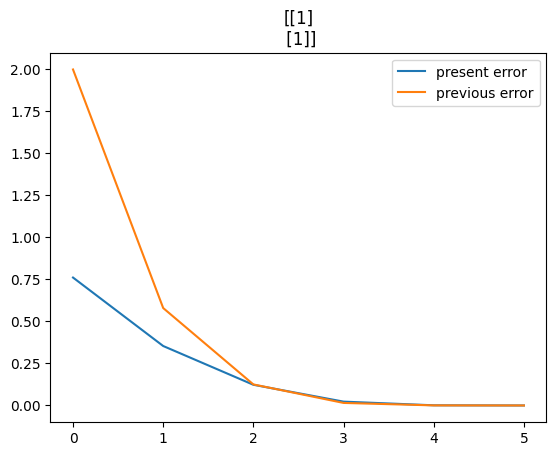

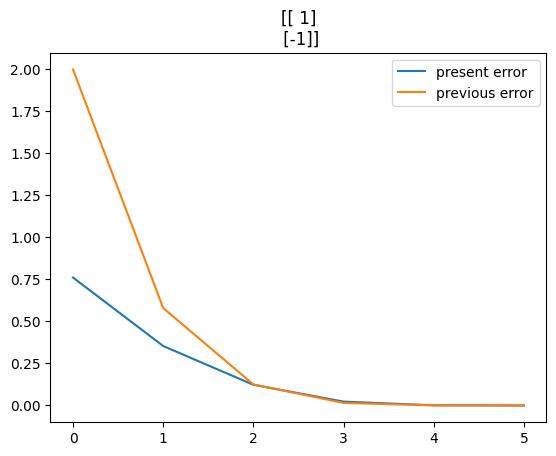

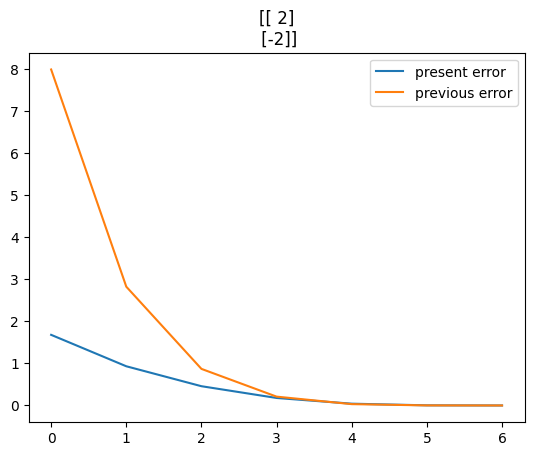

In [63]:
for idx in lhs:
    plt.title(f'{lhs[idx]["x0"]}')
    lhs_err = lhs[idx]['error']
    rhs_err = rhs[idx]['error']
    plt.plot(range(len(lhs_err)), lhs_err, label='present error')
    plt.plot(range(len(rhs_err)), rhs_err, label='previous error')
    plt.legend()
    plt.show()